<div class="alert alert-block alert-success">
    <b><center>Functional API</center></b>
    <b><center>TensorFlow Documents</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
# !pip install mybatis_mapper2sql
import rspy as rsp
rsp.setSystemWarning(off=True)

In [2]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers, datasets, utils

In [3]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
np.set_printoptions(linewidth=200, precision=2)
tf.__version__

'2.2.0'

# MNIST

In [5]:
# Download the mnist dataset using keras
(train_datas, train_labels), (test_datas, test_labels) = datasets.mnist.load_data()
train_datas.shape, train_labels.shape, test_datas.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
# Counting unique value of train data
unique, counts = np.unique(train_labels, return_counts=True)
num_labels = len(unique)
f"Train labels: {dict(zip(unique, counts))}"

'Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}'

In [7]:
@interact(idx=(0, train_datas.shape[0]-1))
def showImage(idx):
    plt.imshow(train_datas[idx], cmap="gray")
    plt.grid(False)
    plt.title(f"LABEL : {train_labels[idx]}")
    plt.show()

interactive(children=(IntSlider(value=29999, description='idx', max=59999), Output()), _dom_classes=('widget-i…

In [8]:
@interact(idx=(0, train_datas.shape[0]-1))
def showImage(idx):
    print(train_datas[idx])

interactive(children=(IntSlider(value=29999, description='idx', max=59999), Output()), _dom_classes=('widget-i…

# Training, Evaluation And Inference
Training, evaluation, and inference work exactly in the same way for models built using the functional API as for Sequential models.

Here, load the MNIST image data, reshape it into vectors, fit the model on the data (while monitoring performance on a validation split), then evaluate the model on the test data:

In [9]:
train_datas = train_datas.reshape(60000, 784).astype("float32") / 255
test_datas = test_datas.reshape(10000, 784).astype("float32") / 255

In [10]:
inputs = tf.keras.Input(shape=(784,))
hidden = layers.Dense(64, activation="relu")(inputs)
hidden = layers.Dense(64, activation="relu")(hidden)
outputs = layers.Dense(10)(hidden)

In [11]:
model = models.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


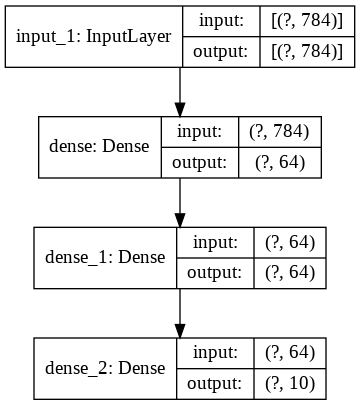

In [12]:
utils.plot_model(model, "intermediate/model.png", True)

In [13]:
model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizers.RMSprop(),
    metrics=["accuracy"],
)

In [14]:
history = model.fit(train_datas, train_labels, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 1s 1ms/step - loss: 0.3380 - accuracy: 0.9041 - val_loss: 0.1812 - val_accuracy: 0.9478
Epoch 2/10
750/750 [==============================] - 1s 1ms/step - loss: 0.1563 - accuracy: 0.9531 - val_loss: 0.1410 - val_accuracy: 0.9585
Epoch 3/10
750/750 [==============================] - 1s 1ms/step - loss: 0.1134 - accuracy: 0.9661 - val_loss: 0.1204 - val_accuracy: 0.9671
Epoch 4/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0914 - accuracy: 0.9728 - val_loss: 0.1116 - val_accuracy: 0.9688
Epoch 5/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0763 - accuracy: 0.9774 - val_loss: 0.1054 - val_accuracy: 0.9712
Epoch 6/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0655 - accuracy: 0.9806 - val_loss: 0.1162 - val_accuracy: 0.9682
Epoch 7/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0553 - accuracy: 0.9831 - val_loss: 0.1094 - val_accuracy: 0.9703
Epoch 

In [15]:
test_scores = model.evaluate(test_datas, test_labels, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 0s - loss: 0.1033 - accuracy: 0.9726
Test loss: 0.10327659547328949
Test accuracy: 0.972599983215332


<AxesSubplot:>

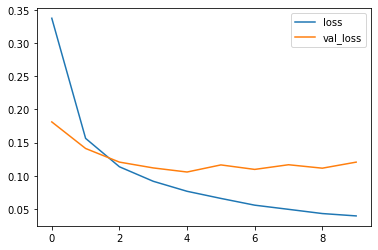

In [16]:
history_df = pd.DataFrame(history.history)
history_df[["loss", "val_loss"]].plot()

<AxesSubplot:>

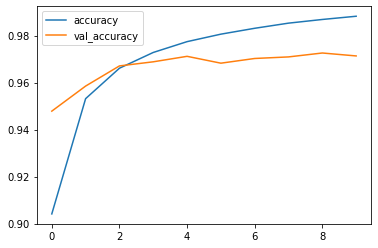

In [17]:
history_df[["accuracy", "val_accuracy"]].plot()

# Save And Serialize

Saving the model and serialization work the same way for models built using the functional API as they do for Sequential models. The standard way to save a functional model is to call model.save() to save the entire model as a single file. You can later recreate the same model from this file, even if the code that built the model is no longer available.

* This saved file includes the:
    - model architecture
    - model weight values (that were learned during training)
    - model training config, if any (as passed to compile)
    - optimizer and its state, if any (to restart training where you left off)

In [23]:
model.save("intermediate/mnist.h5")
del model

In [25]:
# Recreate the exact same model purely from the file:
model = models.load_model("intermediate/mnist.h5")

In [26]:
test_scores = model.evaluate(test_datas, test_labels, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 0s - loss: 0.1033 - accuracy: 0.9726
Test loss: 0.10327659547328949
Test accuracy: 0.972599983215332
